In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

In [8]:
data = datasets.load_wine()

In [13]:
data = datasets.load_breast_cancer()

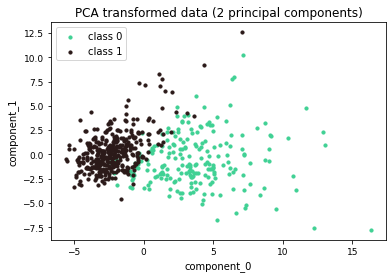

In [14]:
x_data = data.data
y_data = data.target

def pca_own_realization(X, n_components):
    X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    cov_mat = np.cov(X_std, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
    idx = np.argsort(eigenvalues)[::-1][:n_components]
    eigenvectors = eigenvectors[:, idx]
    X_pca = np.dot(X_std, eigenvectors)
    explained_variance = eigenvalues / np.sum(eigenvalues)
    return X_pca, explained_variance

x_trans_data, ev = pca_own_realization(x_data, n_components=2)
x_trans_data

vec_colors = ['blue', 'red', 'green', 'orange', 'lime', 'purple',
              'aqua', 'navy', 'coral', 'teal', 'mustard', 'black',
              'maroon', 'yellow', 'pink']
count_clusters = 3
label_encoder = LabelEncoder()
y_data = label_encoder.fit_transform(y_data)

plt.title('PCA transformed data (2 principal components)')
pten_cluster_entries_1 = []
for cl in np.unique(y_data):
    pvec_cluster_entries_axis_0 = []
    pvec_cluster_entries_axis_1 = []
    for en in range(len(x_trans_data)):
        if cl == y_data[en]:
            pvec_cluster_entries_axis_0.append(x_trans_data[en][0])
            pvec_cluster_entries_axis_1.append(x_trans_data[en][1])
    pten_cluster_entries_1.append([pvec_cluster_entries_axis_0, pvec_cluster_entries_axis_1])

for cl_inx in range(len(pten_cluster_entries_1)):
        plt.scatter(pten_cluster_entries_1[cl_inx][0], pten_cluster_entries_1[cl_inx][1], s=10, c=np.random.rand(3,),
                       marker='o', label=f'class {cl_inx}')
plt.legend(loc='upper left')
plt.xlabel("component_0")
plt.ylabel("component_1")
plt.tick_params(axis='both', which='major', labelsize=9)

plt.show()
